In [3]:
CONFIG_PATH = "configs/small_sample_sub_minority.yml"

In [4]:

from utils import get_config
from superdebug import debug
from process_data import get_model_input
config = get_config(CONFIG_PATH, print_config = False) # default config
target, original_feature_map, categorical_features, string_features, train_data, test_data, test_data_info, train_submission_upvote_df, num_all_users = get_model_input(config)

GPU ready...
------------------ 2022-08-16 20:14:57 ------------------
DEBUG: at /home/TableSense/largedisk/wanrong/Curation-Modeling/process_data.py:358 get_model_input
Loading prepared data...
------------------ 2022-08-16 20:14:57 ------------------


In [9]:
test_data[test_data["SUBREDDIT"] == "r/politics"]

,SUBMISSION_ID,SUBREDDIT,CREATED_TIME,USERNAME,VOTE,TITLE,AUTHOR,#_COMMENTS,NSFW,SCORE,UPVOTED_%,LINK,SUBMISSION_TEXT,UPVOTED_USERS,DOWNVOTED_USERS
81,t3_1fv25y,r/politics,Fri Jun 7 2013,26722,1.0,"Glenn Greenwald on the NSA and PRISM: ""It's we...",6952,686,false,3260,0.95,https://www.reddit.com/r/politics/comments/1fv...,"Glenn Greenwald on the NSA and PRISM: ""It's we...",[],[]
214,t3_e0znx3,r/politics,,25563,1.0,Time to call out and remove Putin’s propagandists,62231,391,false,15360,0.97,https://www.reddit.com/r/politics/comments/e0z...,Time to call out and remove Putin’s propagandists,[],[]
285,t3_ds9jwb,r/politics,Wed Nov 6 2019,7061,1.0,Democrat Andy Beshear just unseated Kentucky’s...,33378,2802,false,52934,0.91,https://www.reddit.com/r/politics/comments/ds9...,Democrat Andy Beshear just unseated Kentucky’s...,[],[]
312,t3_9x6yxy,r/politics,Thu Nov 15 2018,26171,0.0,"No blue wave, but a tsunami of hate",49567,65,false,0,0.21,https://www.reddit.com/r/politics/comments/9x6...,"No blue wave, but a tsunami of hate",[],[]
315,t3_dy7bkz,r/politics,,11484,1.0,Trump Made A Mysterious Unscheduled Hospital V...,45660,229,false,893,0.97,https://www.reddit.com/r/politics/comments/dy7...,Trump Made A Mysterious Unscheduled Hospital V...,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43928,t3_54ffb5,r/politics,Sun Sep 25 2016,2564,0.0,Obama opens African-American museum,22994,211,false,361,0.69,https://www.reddit.com/r/politics/comments/54f...,Obama opens African-American museum,[],[]
44107,t3_9s9ffo,r/politics,Mon Oct 29 2018,26302,1.0,Michael Moore filmed mail bomb suspect 20 mont...,9095,1728,false,22420,0.89,https://www.reddit.com/r/politics/comments/9s9...,Michael Moore filmed mail bomb suspect 20 mont...,[],[]
44214,t3_czpzcc,r/politics,Wed Sep 4 2019,16397,0.0,Trump Showed Off A Fake Hurricane Dorian Forec...,42169,382,false,5865,0.97,https://www.reddit.com/r/politics/comments/czp...,Trump Showed Off A Fake Hurricane Dorian Forec...,[],[]
44226,t3_cvpwu3,r/politics,Mon Aug 26 2019,21609,1.0,Experts: President’s Plan to Host 2020 G-7 at ...,70585,2038,false,40538,0.91,https://www.reddit.com/r/politics/comments/cvp...,Experts: President’s Plan to Host 2020 G-7 at ...,[],[]


In [5]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-08-13 17:24:53 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-5-bf241b5dc052>:5 <module>
0 / 3.  train_upvote num val: 135654
1 / 4.  train_downvote num val: 41313
2 / 5.  test_upvote num val: 34160
3 / 6.  test_downvote num val: 10081
------------------ 2022-08-13 17:24:53 ------------------


------------------ 2022-08-13 17:25:19 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-43b29e4ea0c5>:12 draw_histogram
0 / 7.  distribution str len 552: OrderedDict([(1, 3915), (2, 3745), (3, 3672), (4, 3529), (5, 3253), (6, 2751), (7, 2116), (8, 1697), (9, 1301), (10, 950), (11, 738), (12, 574), (13, 432), (14, 335), (15, 271), (16, 202), (17, 176), (18, 141), (19, 117), (20, 106), (21, 98), (22, 57), (23, 71), (24, 52), (25, 48), (26, 50), (27, 32), (28, 25), (29, 14), (30, 22), (31, 23), (32, 15), (33, 14), (34, 7), (35, 6), (36, 7), (37, 6), (38, 8), (39, 8), (40, 5), (41, 2), (42, 1), (43, 1), (44, 4), (45, 1), (46, 1), (47, 1), (49, 1), (50, 1), (51, 1), (52, ... , (55, 1), (72, 1)])
------------------ 2022-08-13 17:25:19 ------------------


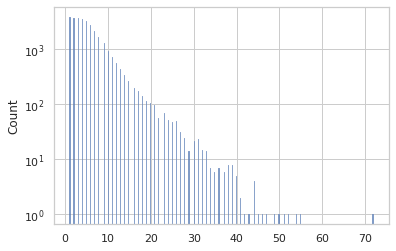

------------------ 2022-08-13 17:25:20 ------------------
DEBUG: at <ipython-input-6-43b29e4ea0c5>:18 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-08-13 17:25:20 ------------------
------------------ 2022-08-13 17:25:20 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-43b29e4ea0c5>:12 draw_histogram
0 / 8.  distribution str len 1115: OrderedDict([(1, 73722), (2, 10147), (3, 3593), (4, 1847), (5, 1145), (6, 767), (7, 479), (8, 427), (9, 302), (10, 232), (11, 172), (12, 148), (13, 156), (14, 91), (15, 93), (16, 86), (17, 63), (18, 70), (19, 63), (20, 60), (21, 45), (22, 63), (23, 37), (24, 28), (25, 34), (26, 19), (27, 28), (28, 22), (29, 15), (30, 11), (31, 19), (32, 22), (33, 5), (34, 13), (35, 14), (36, 11), (37, 12), (38, 8), (39, 11), (40, 10), (41, 8), (42, 11), (43, 10), (44, 7), (45, 8), (46, 5), (47, 5), (48, 4), (49, 4), (50, 7), (51, 8 ... (272, 1), (275, 1)])
------------------ 2022-08-13 17:25:20 -----------

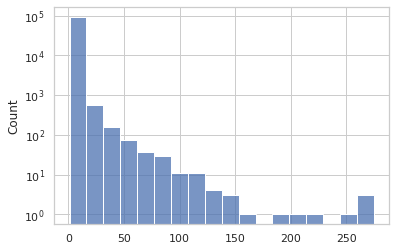

------------------ 2022-08-13 17:25:21 ------------------
DEBUG: at <ipython-input-6-43b29e4ea0c5>:18 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-08-13 17:25:21 ------------------


In [6]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(nums:list, file_name):
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=nums)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(nums).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [7]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

KeyError: 'r/ginger'